In [334]:
import pandas as pd
temp_rain_soil = pd.read_csv("../AucklandCouncilOpenData_08June24/temp_rain_soil_Auckland_2015-10-21to2024-06-08.csv", index_col='Timestamp (UTC+12:00)', parse_dates=True)
temp_rain_soil.head()

,Temp,Rain(mm),SoilMoist,SoilTemp
Timestamp (UTC+12:00),,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950


In [335]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 24
# span = 1440
alpha = 2/(span + 1)

In [336]:
temp_rain_soil['EWMA12rain'] = temp_rain_soil['Rain(mm)'].ewm(alpha=alpha, adjust=False).mean()
temp_rain_soil.head()

,Temp,Rain(mm),SoilMoist,SoilTemp,EWMA12rain
Timestamp (UTC+12:00),,,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400,0.0
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600,0.0
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700,0.0
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725,0.0
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950,0.0


In [337]:
temp_rain_soil['EWMA12soil'] = temp_rain_soil['SoilMoist'].ewm(alpha=alpha, adjust=False).mean()
temp_rain_soil.head()

,Temp,Rain(mm),SoilMoist,SoilTemp,EWMA12rain,EWMA12soil
Timestamp (UTC+12:00),,,,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400,0.0,37.516000
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600,0.0,37.516620
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700,0.0,37.521050
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725,0.0,37.506806
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950,0.0,37.494302


<Axes: xlabel='Timestamp (UTC+12:00)'>

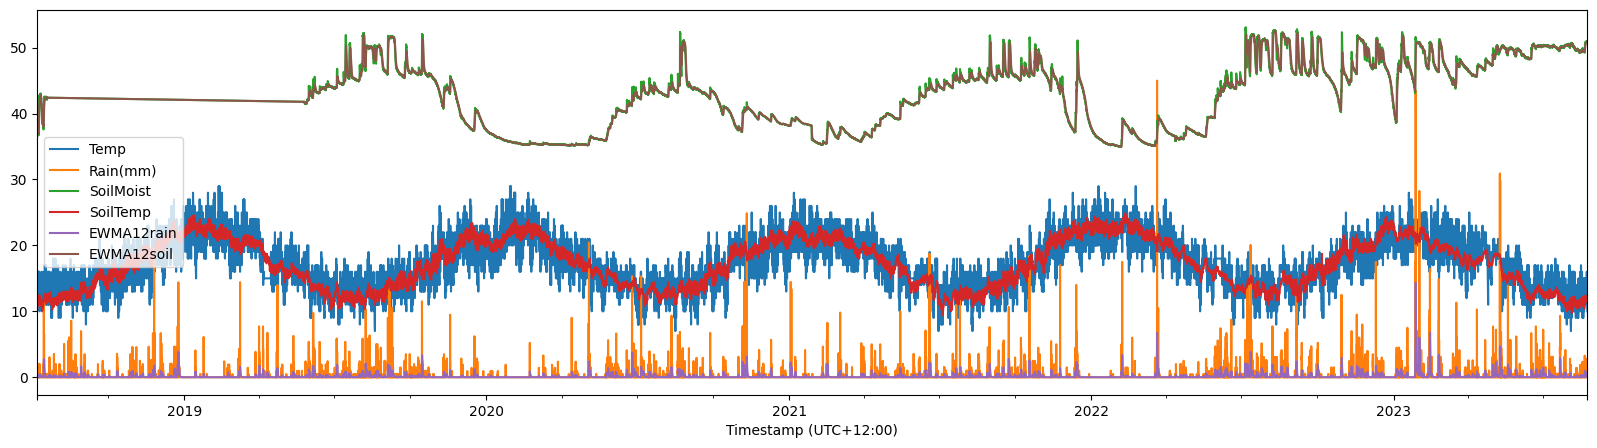

In [338]:
temp_rain_soil.plot(figsize=(20,5))

In [339]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
temp_rain_soil['DES_add_24'] = ExponentialSmoothing(temp_rain_soil['SoilMoist'], trend='add').fit().fittedvalues.shift(-1)
temp_rain_soil.head()

f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


,Temp,Rain(mm),SoilMoist,SoilTemp,EWMA12rain,EWMA12soil,DES_add_24
Timestamp (UTC+12:00),,,,,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400,0.0,37.516000,37.489999
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600,0.0,37.516620,37.505445
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700,0.0,37.521050,37.568872
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725,0.0,37.506806,37.288365
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950,0.0,37.494302,37.310034


<Axes: xlabel='Timestamp (UTC+12:00)'>

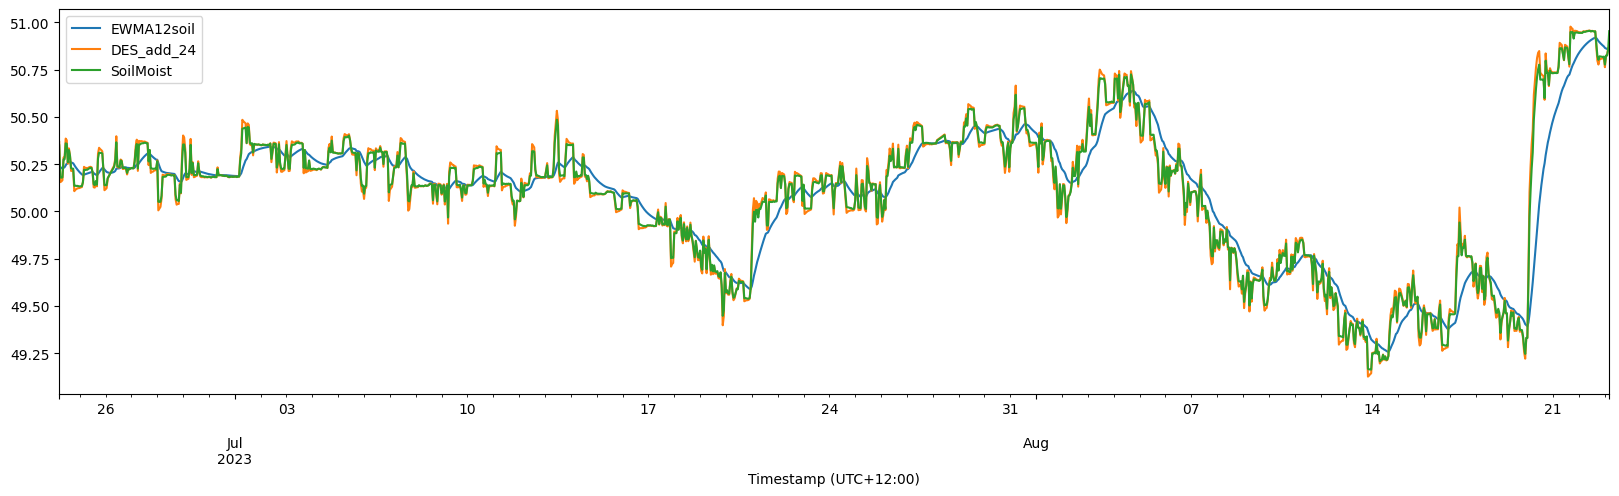

In [340]:
temp_rain_soil[['EWMA12soil','DES_add_24', 'SoilMoist']].iloc[-1440:].plot(figsize=(20,5))

In [341]:
print("Average Temperature", temp_rain_soil['Temp'].mean())
print("Average Rain in (mm)", temp_rain_soil['Rain(mm)'].mean())
print("Average Soil Moisture", temp_rain_soil['SoilMoist'].mean())
print("Average Soil Temperature", temp_rain_soil['SoilTemp'].mean())


Average Temperature 17.030748008721577
Average Rain in (mm) 0.15090775597383527
Average Soil Moisture 42.812376630475086
Average Soil Temperature 17.23282042525104


In [342]:
temp_rain_soil['Year'] = temp_rain_soil.index.year
temp_rain_soil['Month'] = temp_rain_soil.index.month
temp_rain_soil.head()

,Temp,Rain(mm),SoilMoist,SoilTemp,EWMA12rain,EWMA12soil,DES_add_24,Year,Month
Timestamp (UTC+12:00),,,,,,,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400,0.0,37.516000,37.489999,2018,7
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600,0.0,37.516620,37.505445,2018,7
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700,0.0,37.521050,37.568872,2018,7
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725,0.0,37.506806,37.288365,2018,7
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950,0.0,37.494302,37.310034,2018,7


In [343]:
available_years = temp_rain_soil['Year'].unique()
print("Available years in the dataset:", available_years)

if 2023 in available_years:
    this_year_data = temp_rain_soil[temp_rain_soil['Year'] == 2023]
    average_temp_this_year = this_year_data['Temp'].mean()
    average_rain_this_year = this_year_data['Rain(mm)'].mean()
    average_soil_moisture_this_year = this_year_data['SoilMoist'].mean()
    average_soil_temp_this_year = this_year_data['SoilTemp'].mean()

    # Print the averages for this year
    print("\nAverages for the year 2023:")
    print("Average Temperature:", average_temp_this_year)
    print("Average Rain in (mm):", average_rain_this_year)
    print("Average Soil Moisture:", average_soil_moisture_this_year)
    print("Average Soil Temperature:", average_soil_temp_this_year)
else:
    print("\nData for the year 2023 is not available in the dataset.")

Available years in the dataset: [2018 2019 2020 2021 2022 2023]

Averages for the year 2023:
Average Temperature: 16.983276996975626
Average Rain in (mm): 0.28433552748621244
Average Soil Moisture: 48.492219347091265
Average Soil Temperature: 16.63908379291941


In [344]:
available_years = temp_rain_soil['Year'].unique()
print("Available years in the dataset:", available_years)

if 2023 in available_years:
    this_year_data = temp_rain_soil[temp_rain_soil['Year'] == 2022]
    average_temp_this_year = this_year_data['Temp'].mean()
    average_rain_this_year = this_year_data['Rain(mm)'].mean()
    average_soil_moisture_this_year = this_year_data['SoilMoist'].mean()
    average_soil_temp_this_year = this_year_data['SoilTemp'].mean()

    # Print the averages for this year
    print("\nAverages for the year 2022:")
    print("Average Temperature:", average_temp_this_year)
    print("Average Rain in (mm):", average_rain_this_year)
    print("Average Soil Moisture:", average_soil_moisture_this_year)
    print("Average Soil Temperature:", average_soil_temp_this_year)
else:
    print("\nData for the year 2022 is not available in the dataset.")

Available years in the dataset: [2018 2019 2020 2021 2022 2023]

Averages for the year 2022:
Average Temperature: 17.656963470319635
Average Rain in (mm): 0.16792579908675795
Average Soil Moisture: 43.0611970119863
Average Soil Temperature: 18.057485635464232


In [345]:
available_years = temp_rain_soil['Year'].unique()
print("Available years in the dataset:", available_years)

Available years in the dataset: [2018 2019 2020 2021 2022 2023]


In [346]:


# if 2023 in available_years:
#     this_year_data = temp_rain_soil[temp_rain_soil['Year'] == 2023]
#     average_temp_this_year = this_year_data['Temp'].mean()
#     average_rain_this_year = this_year_data['Rain(mm)'].mean()
#     average_soil_moisture_this_year = this_year_data['SoilMoist'].mean()
#     average_soil_temp_this_year = this_year_data['SoilTemp'].mean()

#     # Print the averages for this year
#     print("\nAverages for the year 2023:")
#     print("Average Temperature:", average_temp_this_year)
#     print("Average Rain in (mm):", average_rain_this_year)
#     print("Average Soil Moisture:", average_soil_moisture_this_year)
#     print("Average Soil Temperature:", average_soil_temp_this_year)
# else:
#     print("\nData for the year 2023 is not available in the dataset.")

# # 2022
# if 2022 in available_years:
#     this_year_data = temp_rain_soil[temp_rain_soil['Year'] == 2022]
#     average_temp_this_year = this_year_data['Temp'].mean()
#     average_rain_this_year = this_year_data['Rain(mm)'].mean()
#     average_soil_moisture_this_year = this_year_data['SoilMoist'].mean()
#     average_soil_temp_this_year = this_year_data['SoilTemp'].mean()

#     # Print the averages for this year
#     print("\nAverages for the year 2022:")
#     print("Average Temperature:", average_temp_this_year)
#     print("Average Rain in (mm):", average_rain_this_year)
#     print("Average Soil Moisture:", average_soil_moisture_this_year)
#     print("Average Soil Temperature:", average_soil_temp_this_year)
# else:
#     print("\nData for the year 2022 is not available in the dataset.")
    

# #2021
# if 2021 in available_years:
#     this_year_data = temp_rain_soil[temp_rain_soil['Year'] == 2021]
#     average_temp_this_year = this_year_data['Temp'].mean()
#     average_rain_this_year = this_year_data['Rain(mm)'].mean()
#     average_soil_moisture_this_year = this_year_data['SoilMoist'].mean()
#     average_soil_temp_this_year = this_year_data['SoilTemp'].mean()

#     # Print the averages for this year
#     print("\nAverages for the year 2021:")
#     print("Average Temperature:", average_temp_this_year)
#     print("Average Rain in (mm):", average_rain_this_year)
#     print("Average Soil Moisture:", average_soil_moisture_this_year)
#     print("Average Soil Temperature:", average_soil_temp_this_year)
# else:
#     print("\nData for the year 2021 is not available in the dataset.")
    
# # 2020
# if 2020 in available_years:
#     this_year_data = temp_rain_soil[temp_rain_soil['Year'] == 2020]
#     average_temp_this_year = this_year_data['Temp'].mean()
#     average_rain_this_year = this_year_data['Rain(mm)'].mean()
#     average_soil_moisture_this_year = this_year_data['SoilMoist'].mean()
#     average_soil_temp_this_year = this_year_data['SoilTemp'].mean()

#     # Print the averages for this year
#     print("\nAverages for the year 2020:")
#     print("Average Temperature:", average_temp_this_year)
#     print("Average Rain in (mm):", average_rain_this_year)
#     print("Average Soil Moisture:", average_soil_moisture_this_year)
#     print("Average Soil Temperature:", average_soil_temp_this_year)
# else:
#     print("\nData for the year 2020 is not available in the dataset.")
    

# # 2019
# if 2019 in available_years:
#     this_year_data = temp_rain_soil[temp_rain_soil['Year'] == 2019]
#     average_temp_this_year = this_year_data['Temp'].mean()
#     average_rain_this_year = this_year_data['Rain(mm)'].mean()
#     average_soil_moisture_this_year = this_year_data['SoilMoist'].mean()
#     average_soil_temp_this_year = this_year_data['SoilTemp'].mean()

#     # Print the averages for this year
#     print("\nAverages for the year 2019:")
#     print("Average Temperature:", average_temp_this_year)
#     print("Average Rain in (mm):", average_rain_this_year)
#     print("Average Soil Moisture:", average_soil_moisture_this_year)
#     print("Average Soil Temperature:", average_soil_temp_this_year)
# else:
#     print("\nData for the year 2019 is not available in the dataset.")
    
    
# # 2018
    
# available_years = temp_rain_soil['Year'].unique()
# print("Available years in the dataset:", available_years)

# if 2018 in available_years:
#     this_year_data = temp_rain_soil[temp_rain_soil['Year'] == 2018]
#     average_temp_this_year = this_year_data['Temp'].mean()
#     average_rain_this_year = this_year_data['Rain(mm)'].mean()
#     average_soil_moisture_this_year = this_year_data['SoilMoist'].mean()
#     average_soil_temp_this_year = this_year_data['SoilTemp'].mean()

#     # Print the averages for this year
#     print("\nAverages for the year 2018:")
#     print("Average Temperature:", average_temp_this_year)
#     print("Average Rain in (mm):", average_rain_this_year)
#     print("Average Soil Moisture:", average_soil_moisture_this_year)
#     print("Average Soil Temperature:", average_soil_temp_this_year)
# else:
#     print("\nData for the year 2018 is not available in the dataset.")

In [347]:
annual_avg = temp_rain_soil.groupby('Year').mean().reset_index()

years = []
average_temp = []
average_rain = []
average_soil_moisture = []
average_soil_temp = []

for year in available_years:
    year_data = temp_rain_soil[temp_rain_soil['Year'] == year]

    avg_temp = year_data['Temp'].mean()
    avg_rain = year_data['Rain(mm)'].mean()
    avg_soil_moisture = year_data['SoilMoist'].mean()
    avg_soil_temp = year_data['SoilTemp'].mean()
    
    years.append(year)
    average_temp.append(avg_temp)
    average_rain.append(avg_rain)
    average_soil_moisture.append(avg_soil_moisture)
    average_soil_temp.append(avg_soil_temp)
    
annual_avg = pd.DataFrame({
    'Year': years,
    'Average Temperature': average_temp,
    'Average Rain (mm)': average_rain,
    'Average Soil Moisture': average_soil_moisture,
    'Average Soil Temperature': average_soil_temp
})
    
print("\nAnnual Averages:")
print(annual_avg)


Annual Averages:
   Year  Average Temperature  Average Rain (mm)  Average Soil Moisture  \
0  2018            15.640929           0.143964              42.146378   
1  2019            17.017580           0.119070              43.679461   
2  2020            16.946721           0.105798              39.252029   
3  2021            17.208447           0.128723              41.945960   
4  2022            17.656963           0.167926              43.061197   
5  2023            16.983277           0.284336              48.492219   

   Average Soil Temperature  
0                 15.823845  
1                 17.138549  
2                 17.364665  
3                 17.436549  
4                 18.057486  
5                 16.639084  


In [350]:
import matplotlib.pyplot as plt

# Assuming annual_avg is your DataFrame with annual averages
annual_avg.plot(y=['Temp', 'Rain(mm)', 'SoilMoist', 'SoilTemp'], marker='o', linestyle='-')
plt.title('Annual Averages')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['Temp', 'Rain(mm)', 'SoilMoist', 'SoilTemp'], dtype='object')] are in the [columns]"

In [ ]:
years = temp_rain_soil['Year'].unique()
average_temp = annual_avg['Temp']
average_rain = annual_avg['Rain(mm)']
average_soil_moisture = annual_avg['SoilMoist']
average_soil_temp = annual_avg['SoilTemp']

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = range(len(years))

bar1 = ax.bar(index, average_temp, bar_width, label='Temperature')
bar2 = ax.bar([i + bar_width for i in index], average_rain, bar_width, label='Rainfall')
bar3 = ax.bar([i + 2 * bar_width for i in index], average_soil_moisture, bar_width, label='Soil Moisture')
bar4 = ax.bar([i + 3 * bar_width for i in index], average_soil_temp, bar_width, label='Soil Temperature')

ax.set_xlabel('Year')
ax.set_ylabel('Average Values')
ax.set_title('Annual Averages of Temperature, Rainfall, Soil Moisture, and Soil Temperature')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(years)
ax.legend()

plt.tight_layout()
plt.show()

KeyError: 'Temp'

In [ ]:
annual_avg = temp_rain_soil.resample('Y').mean()

print("Annual Averages:")
print(annual_avg)

Annual Averages:
                            Temp  Rain(mm)  SoilMoist   SoilTemp  EWMA12rain  \
Timestamp (UTC+12:00)                                                          
2018-12-31             15.640929  0.143964  42.146378  15.823845    0.143964   
2019-12-31             17.017580  0.119070  43.679461  17.138549    0.119070   
2020-12-31             16.946721  0.105798  39.252029  17.364665    0.105798   
2021-12-31             17.208447  0.128723  41.945960  17.436549    0.128722   
2022-12-31             17.656963  0.167926  43.061197  18.057486    0.167926   
2023-12-31             16.983277  0.284336  48.492219  16.639084    0.284280   

                       EWMA12soil  DES_add_24    Year     Month  
Timestamp (UTC+12:00)                                            
2018-12-31              42.134050   42.147423  2018.0  9.585309  
2019-12-31              43.685417   43.678937  2019.0  6.526027  
2020-12-31              39.251211   39.252105  2020.0  6.513661  
2021-12-31  

C:\Users\Ying\AppData\Local\Temp\ipykernel_6204\1541022352.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_avg = temp_rain_soil.resample('Y').mean()


In [ ]:
temp_rain_soil.index = pd.to_datetime(temp_rain_soil.index)

seasons = {
    'spring': [3, 4, 5],
    'summer': [6, 7, 8],
    'autumn': [9, 10, 11],
    'winter': [12, 1, 2]
}

temp_rain_soil['Season'] = temp_rain_soil['Month'].apply(
    lambda month: next(season for season, months in seasons.items() if month in months)
)

temp_rain_soil

,Temp,Rain(mm),SoilMoist,SoilTemp,EWMA12rain,EWMA12soil,DES_add_24,Year,Month,Season
Timestamp (UTC+12:00),,,,,,,,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400,0.000000,37.516000,37.489999,2018,7,summer
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600,0.000000,37.516620,37.505445,2018,7,summer
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700,0.000000,37.521050,37.568872,2018,7,summer
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725,0.000000,37.506806,37.288365,2018,7,summer
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950,0.000000,37.494302,37.310034,2018,7,summer
...,...,...,...,...,...,...,...,...,...,...
2023-08-23 00:00:00,11.0,0.0,50.77650,11.900,0.038121,50.864971,50.762724,2023,8,summer
2023-08-23 01:00:00,11.0,0.0,50.82350,11.900,0.035072,50.861653,50.823583,2023,8,summer
2023-08-23 02:00:00,11.0,0.0,50.82475,11.900,0.032266,50.858701,50.825099,2023,8,summer


In [ ]:

seasonal_avg = temp_rain_soil.groupby('Season').mean()
